In [2]:
import pandas as pd
import numpy as np

In [11]:
ccard = pd.read_csv("D://machine learning//310_23498_compressed_creditcard.csv//creditcard.csv")

In [12]:
ccard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
print("Non fraud",ccard["Class"].value_counts()[0]/len(ccard)*100)
print("Fraud",ccard["Class"].value_counts()[0]/len(ccard)*100)

Non fraud 99.82725143693798
Fraud 99.82725143693798


# In the class column we can see that only 0.17% data has 1 as class, Remaining 99.6% data is 0 meaning non fraud cases

# This data is highly imbalanced

In [14]:
ccard.isnull().sum().max()

0

# We can see there are no null values in the dataset

In [15]:
import seaborn as sns

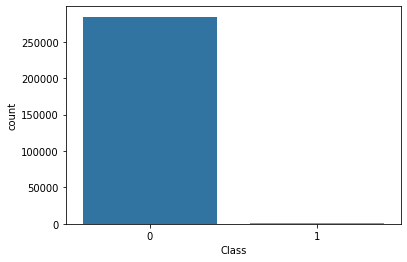

In [16]:
sns.countplot('Class', data=ccard)

# From the above distribution we can see that data is imbalanced.

### Data is more skewed towards Non Fraud cases than fraud cases.
### Hence we need to balance the dataset to have a 50-50 distribution of Fraud and non-Fraud transactions.
### So we create a sub-sample

# Now we will check the distribution of the given data

In [19]:
val = ccard["Amount"].values
time = ccard["Time"].values

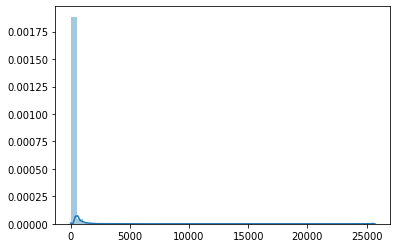

In [22]:
sns.distplot(val)

### From this graph we come to know that the data is unevenly distributed. It is heavily skewed towards the left sie near the origin.

### In order to apply the algorithms of ml, first we need to understand the data. The most important columns of the data is Time and Amount of transaction.

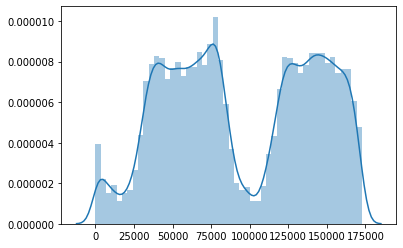

In [23]:
sns.distplot(time)

### From above distributions we can sense that we need to create a sub-sample in order to prevent overfitting and/or wrong correlations.(Since our rest of data is scaled, we need to scale the amount and time in similar scale for better performance of algorithms.)

In [24]:
from sklearn.preprocessing import StandardScaler, RobustScaler